In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

conn = sqlite3.connect('bigmap.db')
data = pd.read_sql_query("SELECT * FROM FEstats", conn)

data.head(5)

,game_number,victory_rank,survival_rank,tactic_rank,units
0,0,S,0,16,Raven-Dorcas-Hector
1,1,S,0,9,Lowen-Guy-Lyn
2,2,F,1,3,Bartre-Rebecca-Lyn
3,3,S,1,10,Heath-Florina-Hector
4,4,S,1,17,Florina-Oswin-Hector


In [4]:
data['victory_rank'].value_counts()

S    228252
F     21748
Name: victory_rank, dtype: int64

<AxesSubplot:xlabel='victory_rank', ylabel='game_number'>

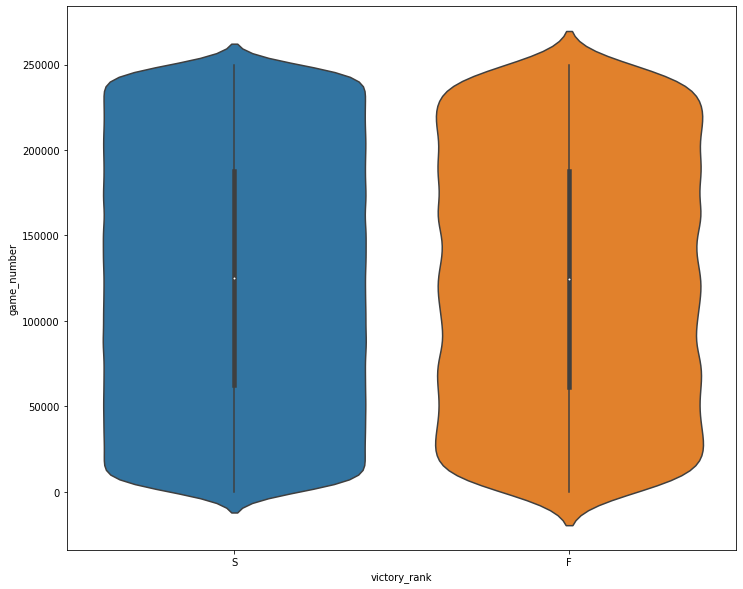

In [5]:
plt.figure(figsize=(12,10))
sns.violinplot(x='victory_rank', y='game_number', data=data)

<AxesSubplot:xlabel='survival_rank', ylabel='game_number'>

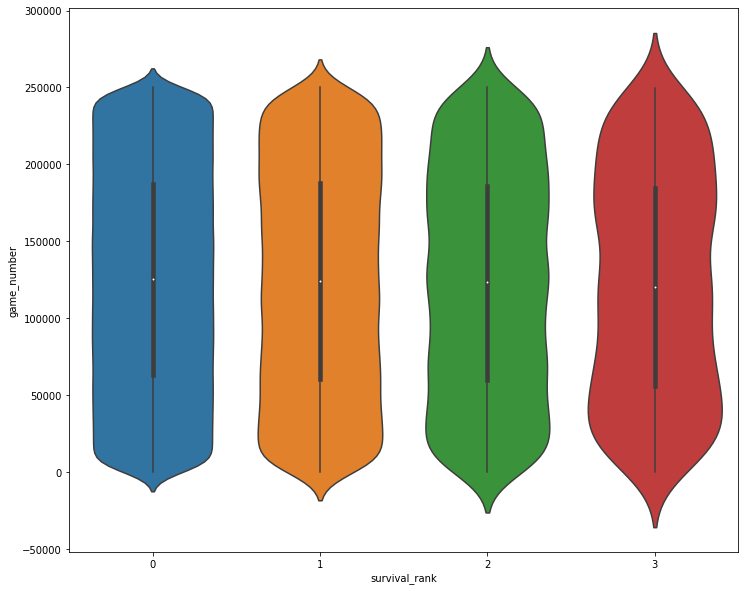

In [6]:
plt.figure(figsize=(12,10))
sns.violinplot(x='survival_rank', y='game_number', data=data)

In [7]:
data['survival_rank'].value_counts()

0    211042
1     32507
2      5323
3      1128
Name: survival_rank, dtype: int64

<AxesSubplot:xlabel='game_number', ylabel='tactic_rank'>

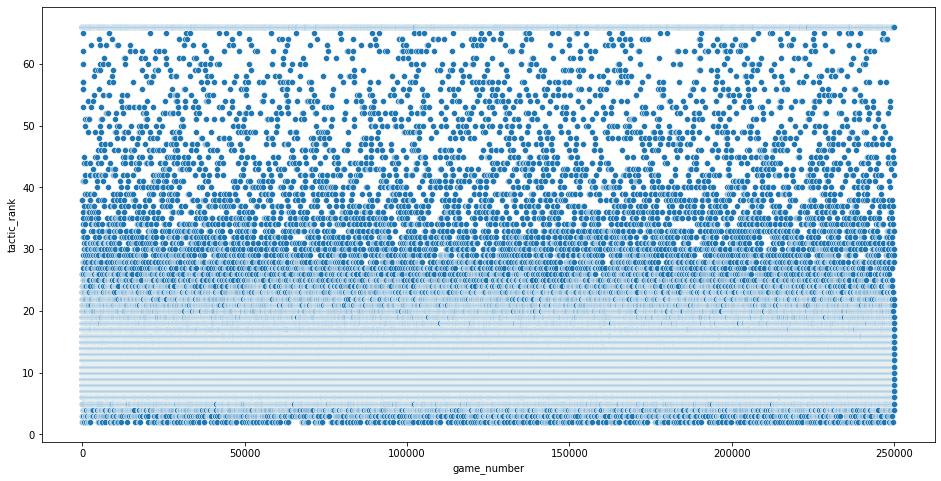

In [8]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='game_number', y='tactic_rank', data=data)

In [9]:
data[["unit_1", "unit_2", "unit_3"]] = data["units"].str.split(pat="-", expand=True)
data.head(10)

,game_number,victory_rank,survival_rank,tactic_rank,units,unit_1,unit_2,unit_3
0,0,S,0,16,Raven-Dorcas-Hector,Raven,Dorcas,Hector
1,1,S,0,9,Lowen-Guy-Lyn,Lowen,Guy,Lyn
2,2,F,1,3,Bartre-Rebecca-Lyn,Bartre,Rebecca,Lyn
3,3,S,1,10,Heath-Florina-Hector,Heath,Florina,Hector
4,4,S,1,17,Florina-Oswin-Hector,Florina,Oswin,Hector
5,5,S,0,23,Oswin-Dart-Hector,Oswin,Dart,Hector
6,6,S,0,15,Oswin-Dorcas-Eliwood,Oswin,Dorcas,Eliwood
7,7,F,1,2,Bartre-Lucius-Lyn,Bartre,Lucius,Lyn
8,8,S,0,10,Lowen-Raven-Eliwood,Lowen,Raven,Eliwood
9,9,F,1,16,Florina-Erk-Hector,Florina,Erk,Hector


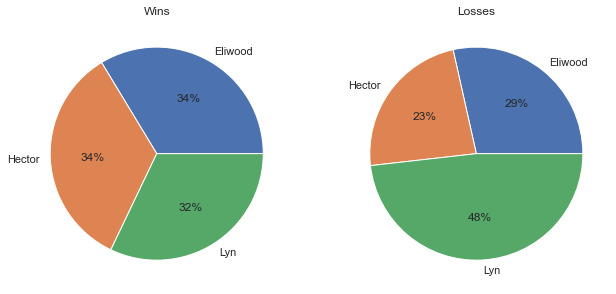

In [13]:
wins = data[data['victory_rank'] == 'S'].value_counts(subset='unit_3').sort_index()
losses = data[data['victory_rank'] == 'F'].value_counts(subset='unit_3').sort_index()

labels = ['Eliwood', 'Hector', 'Lyn']
sns.set_theme()

fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10.5, 5.5)
axs[0].pie(wins, labels=labels, autopct='%.000f%%')
axs[1].pie(losses, labels=labels, autopct='%.0f%%')
axs[0].title.set_text('Wins')
axs[1].title.set_text('Losses')
plt.show()

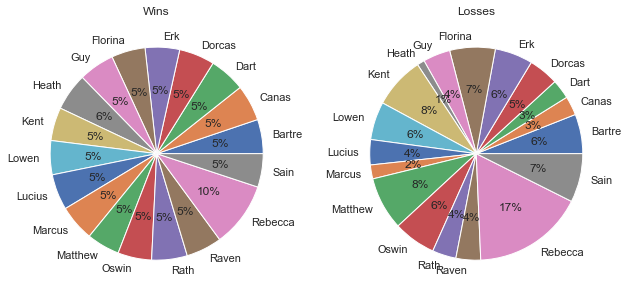

In [12]:
all_wins = data[data['victory_rank'] == 'S']
m_all_wins = pd.melt(all_wins, id_vars=['victory_rank'], value_vars=['unit_1', 'unit_2'])
all_losses = data[data['victory_rank'] == 'F']
m_all_losses = pd.melt(all_losses, id_vars=['victory_rank'], value_vars=['unit_1', 'unit_2'])

wins_count = m_all_wins.value_counts(subset='value').sort_index()
loss_count = m_all_losses.value_counts(subset='value').sort_index()

fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10.5, 5.5)
axs[0].pie(wins_count, labels=wins_count.index, autopct='%.0f%%')
axs[1].pie(loss_count, labels=loss_count.index, autopct='%.0f%%')
axs[0].title.set_text('Wins')
axs[1].title.set_text('Losses')
plt.show()